In [146]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,cross_validation, svm
from sklearn.linear_model import LinearRegression
r= pd.DataFrame.from_csv('test_data.csv')
# random1= pd.DataFrame(columns=['close', 'date', 'high', 'low', 'open', 'volume'])

In [147]:
def create_renko_chart(complete_data,threshold):
    close_data = complete_data['close']
    current_price=close_data[0]
    renko_list=[]
    append_data = [complete_data['close'][0],complete_data['date'][0],complete_data['high'][0],complete_data['low'][0],complete_data['open'][0],complete_data['volume'][0]]
    renko_list.append(append_data)
    for index,data in enumerate(close_data):
        if (data > current_price+threshold or data < current_price - threshold):
            new_append_data = [complete_data['close'][index],complete_data['date'][index],complete_data['high'][index],
                               complete_data['low'][index],complete_data['open'][index],complete_data['volume'][index]]
            renko_list.append(new_append_data)
            current_price=data
        else:
            pass;
    return renko_list
renko_list = create_renko_chart(r,1.5)

In [148]:
renko_df=pd.DataFrame(renko_list,columns=['close', 'date', 'high', 'low', 'open', 'volume'])

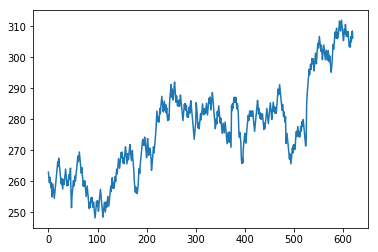

In [149]:
import matplotlib.pyplot as plt
plt.plot(renko_df['close'])
plt.show()

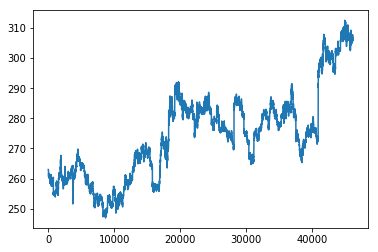

In [150]:
plt.plot(r['close'])
plt.show()

In [151]:
renko_df.head()#after dropping date

,close,date,high,low,open,volume
0,263.00,2016-11-24T09:15:00+0530,263.45,262.3,263.40,129146
1,261.20,2016-11-24T09:35:00+0530,261.60,261.2,261.55,46849
2,259.65,2016-11-24T13:00:00+0530,259.90,259.5,259.90,36422
3,261.35,2016-11-25T09:16:00+0530,261.65,261.1,261.10,60733
4,259.70,2016-11-25T09:20:00+0530,260.15,259.4,260.00,55121


In [152]:
###creating indicators

def exp_moving_avg(values,window):
    weigths = np.exp(np.linspace(-1.,0.,window))
    weigths /= weigths.sum()
    a=np. convolve(values,weigths)[:len(values)]
    a[:window]=a[window]
    return a
renko_df['moving_avg'] = (exp_moving_avg(renko_df['close'],3))
# renko_df.head()
print (len (renko_df['moving_avg'] ))

621


In [195]:
def computeMACD(x, slow=26, fast=12):
    """
    compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
    return value is emaslow, emafast, macd which are len(x) arrays
    """
    emaslow = exp_moving_avg(x, slow)
    emafast = exp_moving_avg(x, fast)
    return (emafast-emaslow)
renko_df['MACD'] = computeMACD(renko_df['close'],slow=26, fast=12)

In [196]:
def TR(c,h,l,o,yc):
    x = h-l
    y = abs(h-yc)
    z = abs(l-yc)
    tr=max(x,y,z)
    return tr
x = 1
TRdates=[]
TrueRanges = []
while x < len(renko_df['close']):
    TrueRange = TR(renko_df['close'][x],
                   renko_df['high'][x],
                   renko_df['low'][x],
                   renko_df['open'][x],
                   renko_df['close'][x-1])
    TrueRanges.append(TrueRange)
    x +=1
renko_df['ATR'] = pd.Series(np.random.randn(len(renko_df['close'])), index=renko_df.index)
renko_df['ATR'][1:]= exp_moving_avg(TrueRanges,5)
renko_df.head()

C:\Users\Subham\Anaconda2\envs\keras_env\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,close,date,high,low,open,volume,moving_avg,ATR,MACD
0,263.00,2016-11-24T09:15:00+0530,263.45,262.3,263.40,129146,260.751795,-0.401671,-1.197418
1,261.20,2016-11-24T09:35:00+0530,261.60,261.2,261.55,46849,260.751795,1.841410,-1.197418
2,259.65,2016-11-24T13:00:00+0530,259.90,259.5,259.90,36422,260.751795,1.841410,-1.197418
3,261.35,2016-11-25T09:16:00+0530,261.65,261.1,261.10,60733,260.751795,1.841410,-1.197418
4,259.70,2016-11-25T09:20:00+0530,260.15,259.4,260.00,55121,260.181549,1.841410,-1.197418


In [214]:
def DM(o,h,l,c,yo,yh,yl,yc):
    moveUp = h-yh
    moveDown = yl-l
    
    if 0 < moveUp > moveDown:
        PDM= moveUp
    else:
        PDM = 0
    if 0 < moveDown > moveUp:
        NDM = moveDown
    else:
        NDM = 0
    return PDM,NDM

def calcDIs():
    x = 1
    TrueRanges = []
    PosDMs = []
    NegDMs = []
    while x < len(renko_df['close']):
        TrueRange = TR(renko_df['close'][x],
                       renko_df['high'][x],
                       renko_df['low'][x],
                       renko_df['open'][x],
                       renko_df['close'][x-1])
        
        TrueRanges.append(TrueRange)
        PosDM,NegDM = DM(renko_df['open'][x],
                                renko_df['high'][x],renko_df['low'][x],
                                renko_df['close'][x],
                                renko_df['open'][x-1],
                                renko_df['high'][x-1],
                                renko_df['low'][x-1],
                                renko_df['close'][x-1])
        PosDMs.append(PosDM)
        NegDMs.append(NegDM)
        x +=1
    expPosDM= exp_moving_avg(PosDMs,14)
    expNegDM= exp_moving_avg(NegDMs,14)
    ATR= exp_moving_avg(TrueRanges,14)
    
    xx =0
    PDIs =[]
    NDIs =[]
    
    while xx< len(ATR):
        PDI = 100*(expPosDM[xx]/ATR[xx])
        PDIs.append(PDI)    
        NDI = 100*(expNegDM[xx]/ATR[xx])
        NDIs.append(NDI)
        
        xx+=1
        
    return PDIs,NDIs

In [215]:
def ADX():
    PositiveDI,NegativeDI = calcDIs()    
    xxx = 0
    DXs = []
    
    while xxx< len(renko_df['close'][1:]):
        DX = 100* ((abs(PositiveDI[xxx]-NegativeDI[xxx])
                    /(PositiveDI[xxx]+NegativeDI[xxx])))
        DXs.append(DX)
        xxx +=1
    ADX = exp_moving_avg(DXs,14)
    return ADX
renko_df['ATX'] = pd.Series(np.random.randn(len(renko_df['close'])), index=renko_df.index)
renko_df['ATX'][1:]= ADX()
renko_df.head()

C:\Users\Subham\Anaconda2\envs\keras_env\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,close,date,high,low,open,volume,moving_avg,ATR,MACD,ATX
0,263.00,2016-11-24T09:15:00+0530,263.45,262.3,263.40,129146,260.751795,-0.401671,-1.197418,-0.083905
1,261.20,2016-11-24T09:35:00+0530,261.60,261.2,261.55,46849,260.751795,1.841410,-1.197418,21.425806
2,259.65,2016-11-24T13:00:00+0530,259.90,259.5,259.90,36422,260.751795,1.841410,-1.197418,21.425806
3,261.35,2016-11-25T09:16:00+0530,261.65,261.1,261.10,60733,260.751795,1.841410,-1.197418,21.425806
4,259.70,2016-11-25T09:20:00+0530,260.15,259.4,260.00,55121,260.181549,1.841410,-1.197418,21.425806


In [232]:
new_df = renko_df[['close','volume','moving_avg','ATR','MACD','ATX']][5:]
len(new_df)

616

In [233]:
new_df.tail()

,close,volume,moving_avg,ATR,MACD,ATX
616,306.65,356959,304.759877,1.901013,-1.167363,11.712116
617,305.05,114673,304.655173,2.012114,-1.710584,11.238069
618,306.65,39875,306.158487,1.975637,-1.917550,9.615241
619,308.50,89391,306.184330,2.110841,-1.657330,9.267758
620,306.30,115681,307.153099,2.307365,-1.774293,10.287838


In [234]:
import math
forecast_col = 'close'
forecast_out=2# no of days out
new_df['label']= new_df[forecast_col].shift(-forecast_out)
new_df.dropna(inplace=True)
print (new_df)

      close  volume  moving_avg       ATR      MACD        ATX   label
5    258.00   63374  260.218942  1.841410 -1.197418  21.425806  255.00
6    259.65   32293  259.168451  1.841410 -1.197418  21.425806  257.30
7    255.00  371372  257.947902  2.252238 -1.197418  21.425806  259.20
8    257.30  217130  257.783678  2.358096 -1.197418  21.425806  257.65
9    259.20  240405  256.489110  2.479708 -1.197418  21.425806  256.10
10   257.65   13803  257.948885  2.624346 -1.197418  21.425806  254.55
11   256.10   44018  258.146243  2.875478 -1.197418  21.425806  256.10
12   254.55  134516  256.596243  1.898489 -1.197418  21.425806  257.90
13   256.10   58927  255.623846  1.704614 -1.671219  21.425806  259.65
14   257.90  110178  255.650338  1.597907 -1.881333  21.425806  261.20
15   259.65  139015  257.314402  1.634324 -2.270825  21.425806  262.95
16   261.20    9662  259.052461  1.638371 -2.386311  20.869923  264.60
17   262.95  188578  260.741022  1.709090 -2.184920  20.597242  266.35
18   2

In [235]:
X = np.array(new_df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
new_df.dropna(inplace=True)
y= np.array(new_df['label'])
y= y[forecast_out:]
print(len(X),len(y))

612 612


In [240]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)
clf = LinearRegression(n_jobs=-1)#no of treads that linear regresion supports for traing
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print (accuracy)

0.947488382938


In [241]:
forecast_set= clf.predict(X_lately)
print (forecast_set, accuracy,forecast_out)

[ 303.0398068   306.62360632] 0.947488382938 2
